# Assignment 1

- Christian Nielsen s204131
- Lauge Hermansen s204111
- Karl Meisner s206104

### Github
https://github.com/nielsenchristianole/02467-Computational-Social-Science/blob/main/Part%202.ipynb

### Contribution
Everyone has worked equally on each exercise which have contributed to this assignment and the assignment itself. Even though one may have uploaded more to the github repository, the uploads were done in unison.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import pearsonr
import networkx as nx
import simplejson as json
import netwulf


# Part 1: Datasets for Computational Social Science

**Big:** 
The dataset is approximately 637135 rows of data with 7 features: id,link_id,score,created_utc,author,parent_id,post_link_id


**Always-on**
Yes and no, regarding WallStreetBets, the GME discussion has more or less 'gone out of style' so less informative data can be collected about GME. This could be considered an interesting thing to examine, so yes you can keep collecting data forever theoretically.

**Non-reactive**
It is possibly common knowledge that Reddit is open to the public and that comments and posts can be scraped from the site freely. Still this should not make one believe that the people discussing on this forum are behaving specifically *as if* they are being observed all the time, therefore, it is fair to say, that the data is non-reactive.

**Incomplete**
While the redditors of WallStreetBets are widely considered as the main agents behind GME stocks meteoric rise, it probably does not paint the entire picture of **why** GME stock rose in price so fast. Specifically, other parties oustide WallStreetBets probably invested in the stock as well. 

**Inaccesible**
While we do not know the full legality behind comment and post data on Reddit. We assume that the data, given that Reddit is a public forum, is legal and fully accessible. This is supported by the fact that no identification of any kind is required by Reddit before scraping data off their site.

**Nonrepresentative**
We assume that the conclusions drawn from the comment dataset are more useful for considering general social phenomena, since this is, after all, a very unsual development in the stock market. This could be the effect of large internet communities working together, or even a mixture of two: How internet communities can affect the stock market positively or negatively.

Some parts of this dataset making it non-representetive, is the fact that not all those who browse WallStreetBets, actually comment or create posts. In this, the 'community' is far larger than it would seem. In regards to affecting the stock market, as mentioned before, not only WallStreetBets contributed to the rise of GME, even though it may have been one of the main factors. 

**Drifting**
There is heavy drift present in the dataset. Most specifically, this is in the population of WallStreetBets itself. According to some sites, before the GME 'incident', WallStreetBets had around 1.8 million subscribers, which changed to around 6.6 million in just a few weeks.

This means that many of the 'old guard' of WallStreetBets could have been replaced by a newer generation of redditors, only there for the GME incident, it can also be assumed that the posts and comments in the period, reflect this change.

In particular when studying the amount of comments and posts over time, the drift in the dataset could easily explain some part of the increased comment and post amount.

**Algorithmically confounded**
The data is not strictly algorithmically confounded in the way of inaccesible data due to reddit itself. More, is is algorithmically confounded due to reddit promoting popular posts and media. Any subject on Reddit can be seen as kind of a positive feedback loop, where one subject becoming popular, leads to more people seeing that particular subject and making posts of it.

Additionally, any popular posts are brought to the 'hot' page of a subreddit, which is the default thing most people see on reddit. Therefore, comments are more likely to be made on already popular posts, than new posts. This skews especially data when looking at what posters or commentors are the most popular, although does little to skew the overall picture of amount of comments per day

**Dirty**
There are a number of factors contributing to making the dataset dirty:

- Spammers: It can be reasoned, that a quickly popular subreddit such as WallStreetBets attracts a number of spammers who do not contribute valuable data tot he site itself
- Uninformative comments/posts. Many comments on reddit do not actually reflect anything useful being said, despite not explicitly being spamming.
- Bot comments/posts: There are a number of bots on reddit, generating automatic responses to either rule breaking or by simple user requesting. This can also fall under spamming, but is less intentonal.
- Moderation: Some posts or comments are deleted by moderators due to not follwing specific rules. While likely 'fair' in the given context, it muddies the actual picture of how many people comment or post every day.

**Sensitive**
Since only posts and comments are downloaded, which are public domain anyway, it is unlikely there is any especially sensitive pieces of data. The only possiblity of this, would be if the comments themselves hold sensetive information. 

Some information can argued are sensitive, like if users write about their personal finances. Even so, again, this is WallStreetBets, that is literally why the site was started, and most 'sensitive' data is shared willingly by the people on the site.


# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.


In [2]:
GME_market_data = pd.read_csv('GME.csv',parse_dates=['Date'],).set_index('Date')

In [3]:
df_comments_raw = pd.read_csv('./data_comments.csv')
df_comments_raw['time'] = [datetime.utcfromtimestamp(time + np.random.rand()) for time in df_comments_raw['created_utc']]
df_comments = df_comments_raw[df_comments_raw['created_utc'] <= 1611529173].copy().set_index('time')
df_comments['num_comments'] = np.ones(len(df_comments))
df_comments = df_comments.sort_index()

df_finance = pd.read_csv('GME.csv', parse_dates=['Date']).set_index('Date')
df_finance['num_comments'] = df_comments['num_comments'].resample('1D').sum()#[df_finance.index]

In [4]:
import matplotlib as mpl
import matplotlib.dates as mdates

def setup_mpl():
    mpl.rcParams['font.family'] = 'Comic Sans MS'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


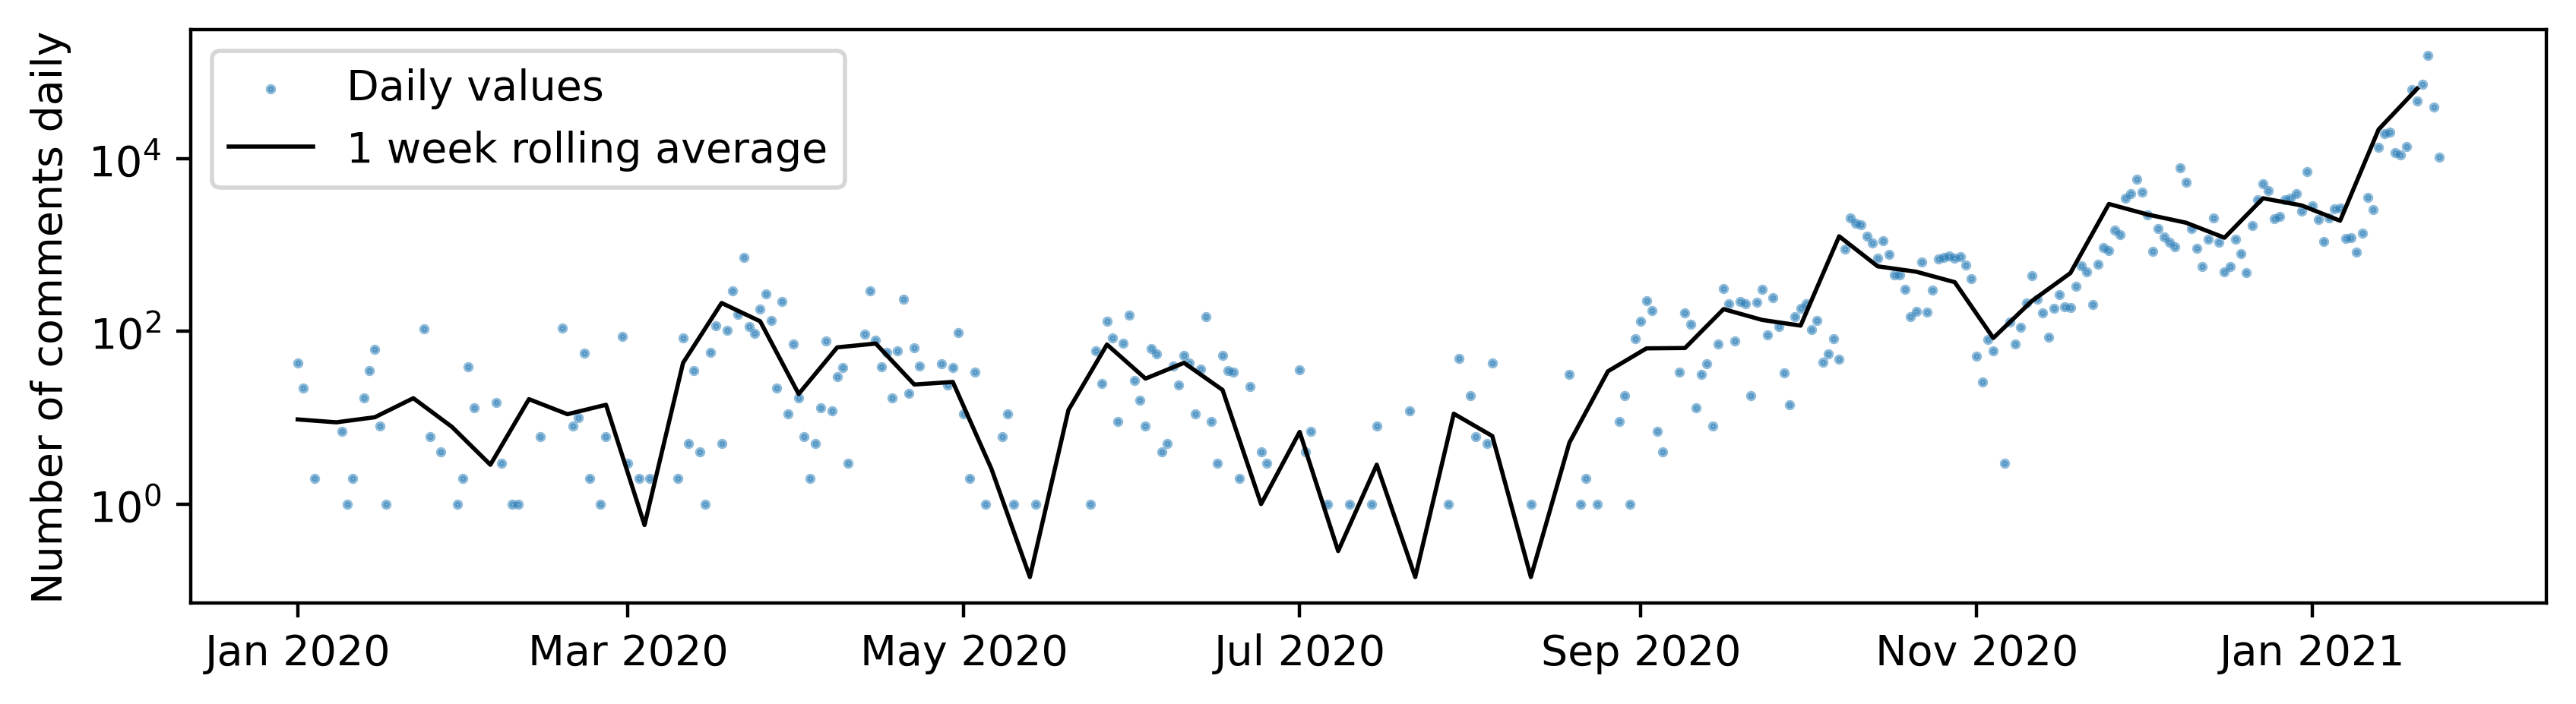

In [5]:
myFmt = mdates.DateFormatter('%b %Y')
fig, ax  = plt.subplots(figsize=[10, 2.5], dpi=400)


rolled_series = df_comments['num_comments'].resample('1D').sum()
ax.scatter(rolled_series.index, rolled_series.values, alpha=0.5, s=2, label="Daily values")

rolled_series = rolled_series.resample('7D').mean()
ax.plot(rolled_series.index, rolled_series.values, color='k', label="1 week rolling average")

ax.set_ylabel('Number of comments daily')
ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFmt)
plt.show()

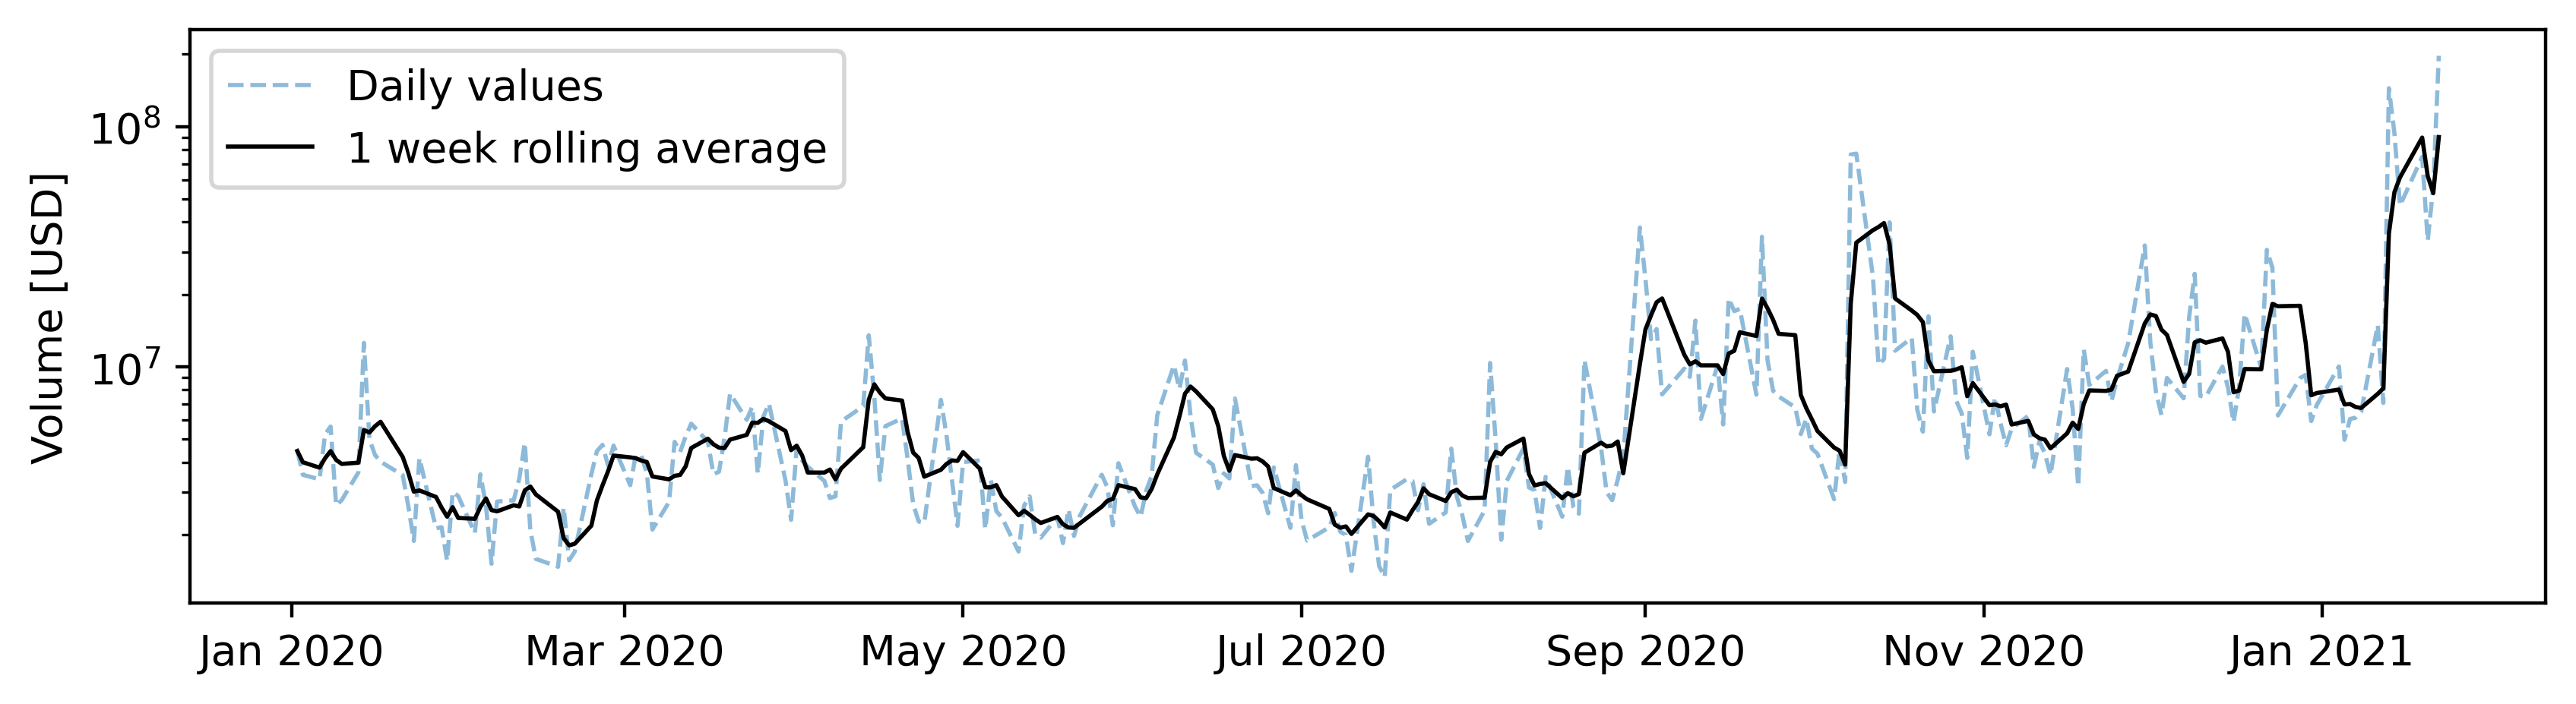

In [6]:
myFmt = mdates.DateFormatter('%b %Y')
fig, ax  = plt.subplots(figsize=[10, 2.5], dpi=400)
ax.plot(df_finance.index, df_finance['Volume'], ls='--', alpha=0.5, label="Daily values")

rolled_series = df_finance['Volume'].rolling('7D').mean()
ax.plot(rolled_series.index, rolled_series.values, color='k', label="1 week rolling average")

ax.set_ylabel('Volume [USD]')
ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFmt)
plt.show()

> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?

The property of the log scale is that exponential growth is represented as a straight line. This means, that the slope of a line between two points is not the absolute change, but the relative change. The reason this is an advantage is that the high values won't dominate the plot, so we're able to see what happens when the volume/number of comments is low. Furthermore it supports the fact that the interesting thing is not the excact number by which the quantity changed - it is much more interesting investigate the relative development, that is, how much did we multiply by, to get a specific change.

> 4. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

First it is interesting to see that there appears to be a correspondance between the number of comments, and the volume.

Seconly, it looks like the growth is faster than exponential as there seems to be a trend that is not linear. This means that the growth is unnatural.

Finally, it is important to notice, that many of the days prior to the unnatural rise in GME price, there were no comments about GME on r/wallstreetbets, so we have no datapoints from those days, as $log(0)$ is not defined.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t.

In [7]:
log_return_volume = np.log(df_finance['Volume'] / df_finance['Volume'].shift())
log_return_comments = np.log(df_finance['num_comments'] / df_finance['num_comments'].shift())

df = pd.DataFrame({'Volume': log_return_volume,
                   'num_comments': log_return_comments})

df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

/home/dayman/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant?
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


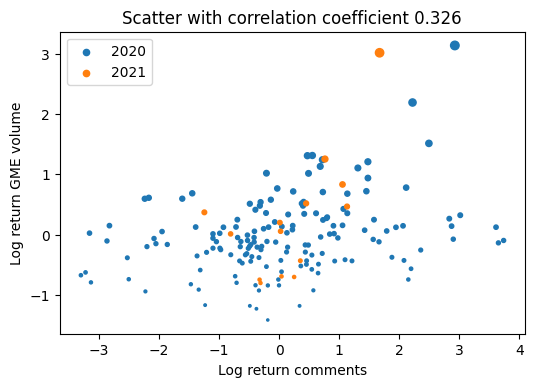

In [8]:
day_critical = datetime(year=2021, month=1, day=1)

fig, ax = plt.subplots(dpi=100)

ax.scatter(df['num_comments'][df.index < day_critical],
           df['Volume'][df.index < day_critical],
           s=(df['Volume'][df.index < day_critical] + 3)**2,
           label="2020")

ax.scatter(df['num_comments'][df.index >= day_critical],
           df['Volume'][df.index >= day_critical],
           s=(df['Volume'][df.index >= day_critical] + 3)**2,
           label="2021")

ax.set_xlabel('Log return comments')
ax.set_ylabel('Log return GME volume')

correlation, p_value = pearsonr(df['num_comments'], df['Volume'])
plt.title(f'Scatter with correlation coefficient {correlation:.3}')

ax.legend()
plt.show()

The p-value is 1.3435164632500279e-05 which is pretty low, the odds are there is a pretty strong correlation as shown.

> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 

1. You can see a bit of a correlation that an increase in number of comments will most likely lead to an increase in GME sales volume. This is, however, also disputed a bit by a bunch of outliers.
2. It seems that in 2020, the reactions in general were more 'flat' so to speak, comments and volumes were not as correlated as they could be, this changes somewhat for 2021.
3. A stark drop in the number of comments (for 2020) does not seem to lead to the same decrease in GME volume as the same increase in number of comments leads to an increase in GME volume.

> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*

The two seem pretty correlated, there are some spikes in both comments and volume that do not explain each other, but as the time trends towards 2021, both seem to follow each other relatively well.

Therefore, we can conclude that there must be *some* relation between comments and the volume of GME

# Part 3

**Königsberg Problem**
Each corner can be represented as as node and each line an edge. The problem is now analogous finding Euler paths in the graphs. This can be done if and only if two or less nodes has an uneven degree assuming all nodes belongs in the same graph.

The above is true for a., c. and d. where b has four nodes of degree 3.

**Graph Representation**



In [9]:
A = np.array([[0, 1, 1, 1, 0, 1],
              [1, 0, 1, 1, 0, 0],
              [1, 1, 0, 0, 0, 1],
              [1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 0]])

dA = np.array([[0, 1, 0, 0, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [1, 1, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [1, 0, 1, 0, 0, 0]])


def link_list(A):
    A = np.pad(A, 1)
    d = {i: list(np.where(row)[0]) for i, row in enumerate(A) if max(row)}
    return d

G = nx.convert_matrix.from_numpy_matrix(A)
dG = nx.convert_matrix.from_numpy_matrix(dA, create_using=nx.DiGraph)

def all_paths(G, start_nodes, target_node, iteration):
    
    iteration -= 1
    
    if iteration <= 0:
        count = 0
        for e in start_nodes:
            if e == target_node:
                count += 1
        return count
    else:
        end_nodes = []
        for node in start_nodes:
            end_nodes.extend(list(G.adj[node]))
        
        return all_paths(G, end_nodes, target_node, iteration)


Undirected:

In [10]:
print("Adjecency list:\n", A)
print("\nLink list:\n", link_list(A))

Adjecency list:
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Link list:
 {1: [2, 3, 4, 6], 2: [1, 3, 4], 3: [1, 2, 6], 4: [1, 2], 6: [1, 3]}


Directed:

In [11]:
print("Adjecency list:\n", dA)
print("\nlink list:\n", link_list(dA))

Adjecency list:
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

link list:
 {1: [2], 2: [3, 4], 3: [1, 2], 4: [1], 6: [1, 3]}


In [12]:
print(f"\nAverage clustering coefficient of 2.20a: {nx.average_clustering(G):.2}")


Average clustering coefficient of 2.20a: 0.64


Switching the labels of two nodes corrosponds to swapping the
two nodes columns and rows in the adjecency matrix.
For the linked list it corrosponds to just switching the key labels

In a link list, you can't see the weight of the edge.
However it's quite easy to modify the implementation to support storing of edge weights.

In [13]:
print("In the (a) network, how many paths (with possible repetition of nodes and links)\
of length 3 exist starting from node 1 and ending at node 3?\n", all_paths(G, list(G.adj[0]), 2, 3))

print("\nAnd in (b)?\n", all_paths(dG, list(dG.adj[0]), 2, 3))

print("\nWith the help of a computer, count the number of cycles of length 4 in both networks.")
print("For (a):", sum([all_paths(G, list(G.adj[i]), i, 4) for i in range(6)]), "\nFor (b): ", sum([all_paths(dG, list(dG.adj[i]), i, 4) for i in range(6)]))

In the (a) network, how many paths (with possible repetition of nodes and links)of length 3 exist starting from node 1 and ending at node 3?
 7

And in (b)?
 0

With the help of a computer, count the number of cycles of length 4 in both networks.
For (a): 86 
For (b):  2


# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).

In [14]:
# import redditors network graph file, and convert to undirected reciprocal.
filename = './reddit_network.json'

with open(filename) as f:
    data = json.load(f)
    directed_reddit_network = nx.node_link_graph(data, directed=True)
    reddit_network = directed_reddit_network.to_undirected(reciprocal=True)
    
reddit_network.remove_edges_from(nx.selfloop_edges(reddit_network))
reddit_network.remove_nodes_from(list(nx.isolates(reddit_network)))

In [15]:
#TODO is this block nessecary?

# print how many nodes was removed, when removing isolates
proportion_of_nodes_kept = reddit_network.number_of_nodes()/directed_reddit_network.number_of_nodes()
print(f'Kept {reddit_network.number_of_nodes()} \
nodes of {directed_reddit_network.number_of_nodes()}, \
{proportion_of_nodes_kept:.2%}, \
post clean')
print(f'This means, that {proportion_of_nodes_kept:.2%} of the redditors have no others they interact with on reddit.')

Kept 10308 nodes of 26255, 39.26%, post clean
This means, that 39.26% of the redditors have no others they interact with on reddit.


In [16]:
#compute p using equation 3.2 fom NS
L = reddit_network.number_of_edges()
N = reddit_network.number_of_nodes()
p = L*2/(N*(N-1))

#compute <k>
k = p*(N-1)

#print answers
print("calculate p and <k>")
print(f'p = 2*L/(N*(N-1)) = {p:.4%}')
print(f'<k> = p*(N-1) = {k:.3}')

calculate p and <k>
p = 2*L/(N*(N-1)) = 0.0303%
<k> = p*(N-1) = 3.12


> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.

In [17]:
#create random network

# loop over all pairs of nodes
# for each pair, generate random number, r, from uniform (0,1) dist
# if r <= p, add edge to edge list
# finally create graph from edge list
edge_list = []
for node1 in range(N-1):
    print(f'\r{node1/N:.0%}',end = '')
    for node2 in range(node1+1,N):
        if np.random.rand() <= p: edge_list.append((node1,node2))

random_network = nx.Graph()
random_network.add_edges_from(edge_list)

100%

> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


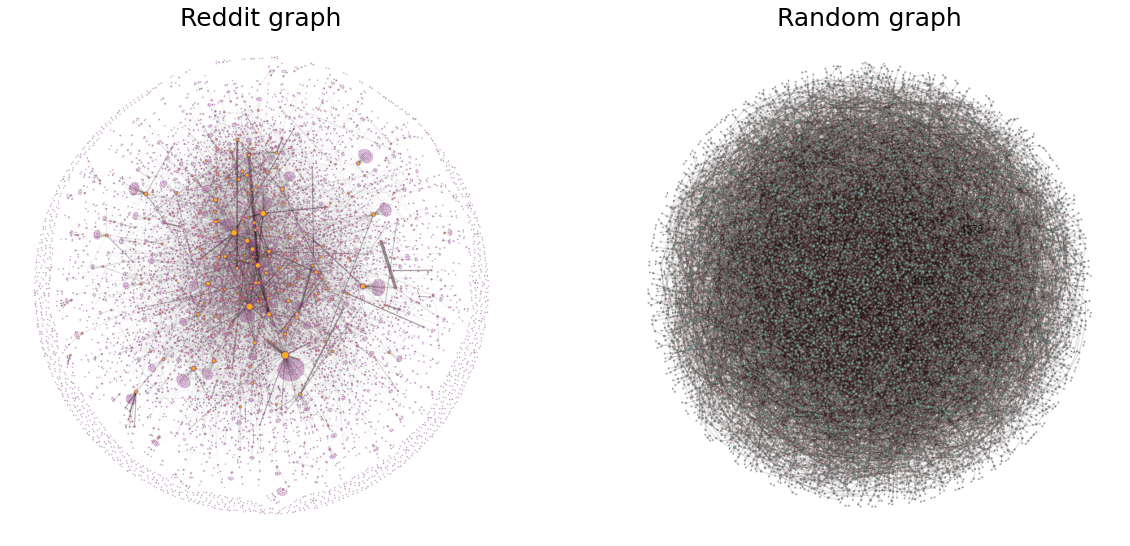

In [18]:
#Visualizing the networks
# visualized using netwulf.visualize(graph)
# - tweaked in the interactive editor, and stored as image
# here the results are shown


img_reddit = mpimg.imread('reddit_network.png')
img_random = mpimg.imread('random_network.png')
fig, axs = plt.subplots(1, 2 ,figsize = (20,15))
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Reddit graph', fontsize = 25)
axs[1].set_title('Random graph', fontsize = 25)
axs[0].imshow(img_reddit)
axs[1].imshow(img_random)
plt.show()


It is hard to really compare the two visualisations, as the results depend
heavily on how we tweak the visualization parameters.
The best way to asses the differences between the two graphs, is the fact
that we weren't able to find a good way of visualising the random graph.
No matter what we did, the random graph would always look messy.

On the contrary, it is clear to see, on the reddit graph, that the redditors
seem to behave as a real world social network.
Some redditors are popular, as many people interact with them, while 
some redditors only interact with a few others. Additionally, some of the 
edges are very heavy, which means that some redditors interact a lot
with each other, while some don't interact that much. This corresponds to
real life, where some friends are closer than others.

> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [19]:
#compute clustering coefficients
 
#first create function
def compute_clustering_coefficients(graph):
    clc = {}
    for node in graph.nodes:
        n_triangles = 0
        neighbours = list(graph[node].keys())
        n_neighbours = len(neighbours)
        if n_neighbours != 1:
            for i in range(n_neighbours-1):
                for j in range(i+1,n_neighbours):
                    n_triangles += neighbours[i] in graph[neighbours[j]]
            clust_coef = 2*n_triangles/(n_neighbours*(n_neighbours-1))
        else:
            clust_coef = 0
        clc[node] = clust_coef
    return clc

#compute using the function
reddit_clustering_coefficients = compute_clustering_coefficients(reddit_network)
random_clustering_coefficients = compute_clustering_coefficients(random_network)

In [20]:
print(f"reddit avg. clustering = {np.mean(list(reddit_clustering_coefficients.values())):.4}")
print(f"random avg. clustering = {np.mean(list(random_clustering_coefficients.values())):.4}")

reddit avg. clustering = 0.01842
random avg. clustering = 0.0002063


The comparison between the random clustering and reddit clustering is quite expected. It is generally known that random graphs cluster far less than real graphs; reddit is probably an extreme example of this: More popular comments are highlighted on reddit, and therefore far more likely to recieve new comments, leading to even greater clustering.